## classification predictive modeling Sonar Data

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [2]:
# Load dataset
file = 'sonar_all_data.csv'
dataset = pd.read_csv(file, header=None)

## Analyze Data

In [3]:
# shape
print(dataset.shape)

(208, 61)


In [4]:
# types
pd.set_option('display.max_rows', 500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [5]:
# head
#pd.set_option('display.width', 100)
pd.set_option('display.max_columns', None)
print(dataset.head(20))

        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10  0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11  0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.05

In [6]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)
print(dataset.describe())

            0          1        2        3        4        5        6   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373   

            7        8        9        10       11       12       13       14  \
count  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.135    0.178    0.208    0.236    0.250    0.273    0.297    0.320   
std      0.085    0.118    0.134    0.133    0.140    0.141    0.164    0.205   
min      

In [7]:
# class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


## Unimodal Data Visualizations

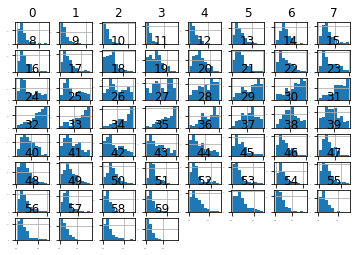

In [8]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

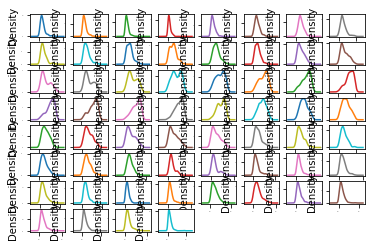

In [9]:
# density

dataset.plot(kind='density', subplots=True, layout= (8,8), sharex=False, legend=False,fontsize=1)
plt.show()

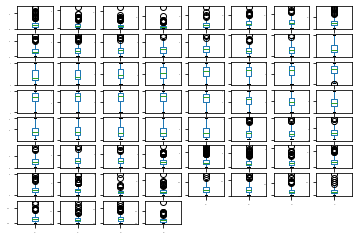

In [10]:
# box and whisker plots
dataset.rename(columns=lambda x: str(x)).plot.box(subplots=True, layout=(8,8), sharex=False, sharey=False,fontsize=1)
#dataset.plot.box(subplots=True, layout=(8,8), by=dataset.index)
plt.show()

<AxesSubplot:>

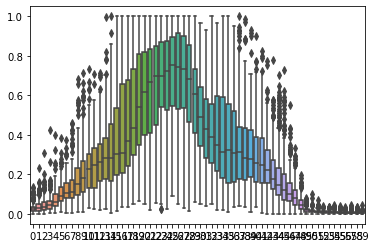

In [11]:
import seaborn as sns
sns.boxplot(data=dataset)

# Multimodal Data Visualizations

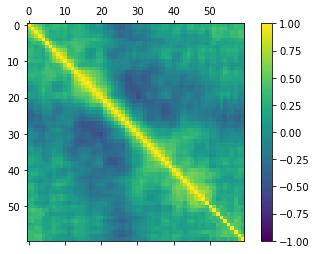

In [12]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

## Dataset splitting

In [13]:
## split the dataset 
data = dataset.values
X = data[:, 0:60].astype(float)
y = data[:,60]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state= 7)


## Evaluate Algorithms

In [14]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [15]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [16]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg =(name, cv_results.mean(), cv_results.std())
    print(msg)
    

('LR', 0.7694852941176471, 0.10051029509664779)
('LDA', 0.7463235294117647, 0.11785367885381073)
('KNN', 0.8080882352941176, 0.06750704820308338)
('CART', 0.6992647058823529, 0.087694420681621)
('NB', 0.6488970588235294, 0.1418684214516758)
('SVM', 0.7764705882352941, 0.09041128152498236)


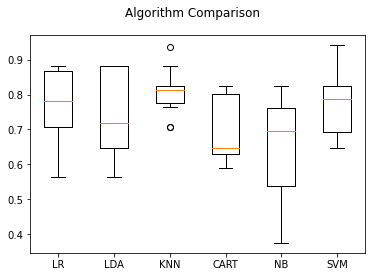

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Evaluate Algorithms: Standardize Data

In [18]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [19]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg =(name, cv_results.mean(), cv_results.std())
    print(msg)

('ScaledLR', 0.7404411764705883, 0.09466751140841813)
('ScaledLDA', 0.7463235294117647, 0.11785367885381073)
('ScaledKNN', 0.8257352941176471, 0.054511038214266574)
('ScaledCART', 0.7231617647058823, 0.10477683175358156)
('ScaledNB', 0.6488970588235294, 0.1418684214516758)
('ScaledSVM', 0.8363970588235293, 0.08869747214968386)


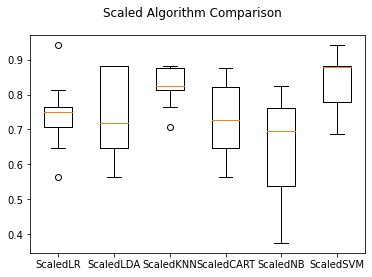

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Algorithm Tuning KNN and SVM

In [21]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = list(range(1,22))
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.850000 using {'n_neighbors': 1}


In [22]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.850000 (0.059686) with: {'n_neighbors': 1}
0.801838 (0.087812) with: {'n_neighbors': 2}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.807353 (0.084049) with: {'n_neighbors': 4}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.746691 (0.097582) with: {'n_neighbors': 6}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.734559 (0.082057) with: {'n_neighbors': 8}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.728309 (0.090972) with: {'n_neighbors': 10}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.722059 (0.099145) with: {'n_neighbors': 12}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.084750) with: {'n_neighbors': 14}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.716176 (0.082893) with: {'n_neighbors': 16}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.716544 (0.094514) with: {'n_neighbors': 18}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.728676 (0.087463) with: {'n_neighbors': 20}
0.710294 (0.109505) with: {'n_neighbors': 21}


In [23]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(random_state=7)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}


In [24]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.758824 (0.047088) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'}
0.769853 (0.111321) with: {'C': 0.9, 'kernel': 

## Ensemble Methods

In [25]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('XGB', XGBClassifier()))

In [26]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.819853 (0.058293)
GBM: 0.835662 (0.113257)
RF: 0.831250 (0.083634)
ET: 0.866176 (0.078166)
XGB: 0.830882 (0.100644)


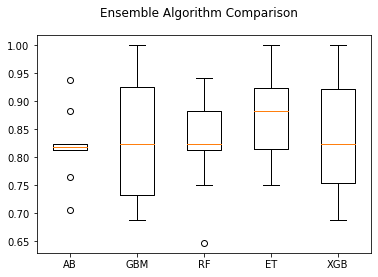

In [27]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Finalize Model

In [28]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0)
model.fit(rescaledX, y_train)

SVC(C=2.0)

In [29]:
# estimate accuracy on test dataset
rescaledtestX = scaler.transform(X_test)
predictions = model.predict(rescaledtestX)
print(accuracy_score(y_test, predictions))

0.9285714285714286


In [30]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[25  2]
 [ 1 14]]
              precision    recall  f1-score   support

           M       0.96      0.93      0.94        27
           R       0.88      0.93      0.90        15

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42

